In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
from imblearn.over_sampling import RandomOverSampler

In [4]:
cols = ["fLength","fWidth","fSize", "fConc", "fConcl", "fAsym", "fMllong", "fX3Trans", "fAlpha",  "fDist", "class"]
df = pd.read_csv("/home/ashwin/GIT/ml/magic04.data",names=cols)

In [5]:
df["class"] = (df["class"]=="g").astype(int)

In [6]:
print(df)

        fLength    fWidth   fSize   fConc  fConcl     fAsym   fMllong  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fX3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610 

In [7]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fMllong,fX3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


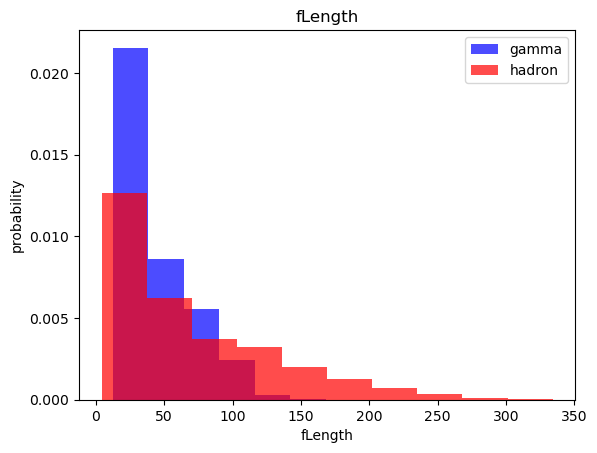

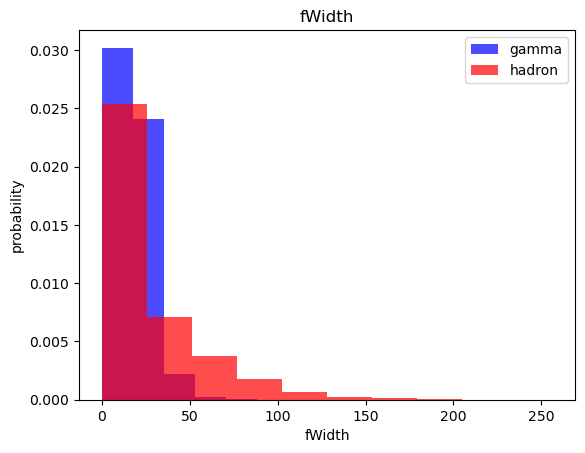

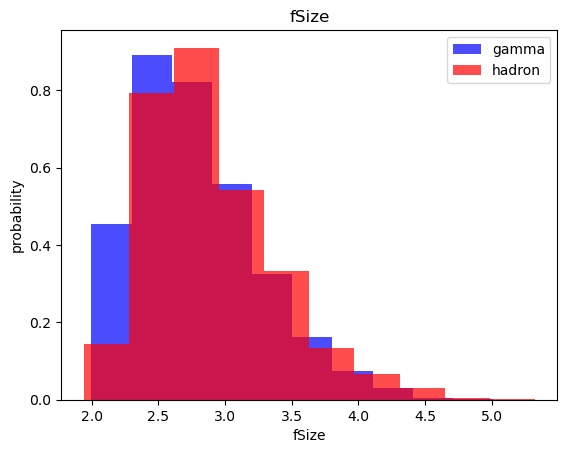

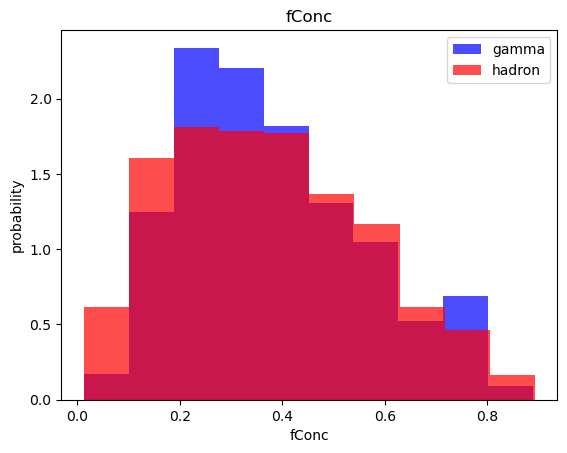

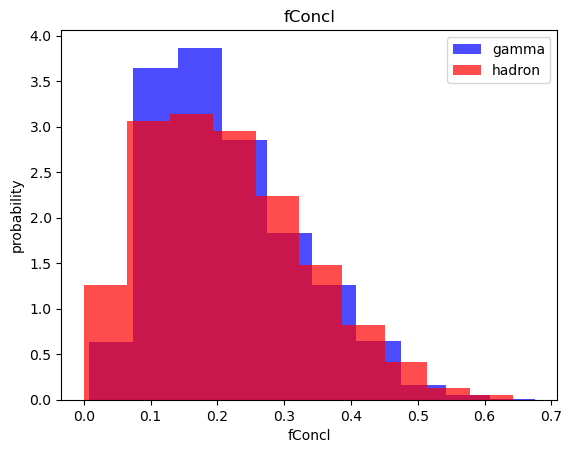

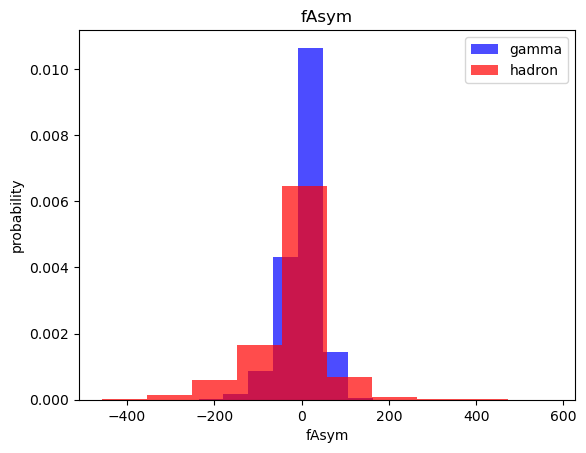

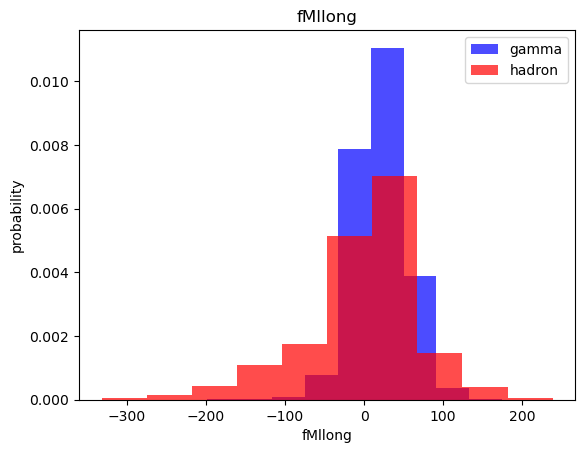

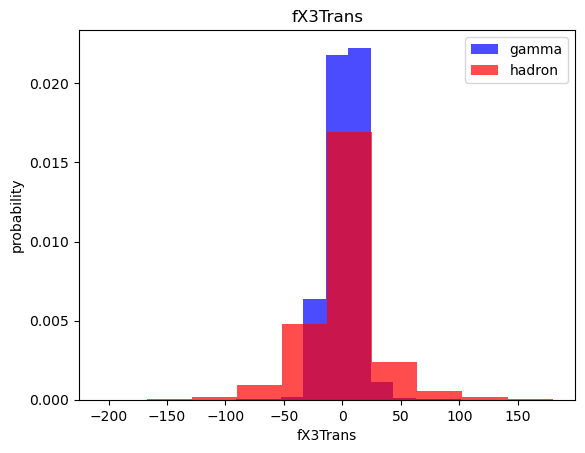

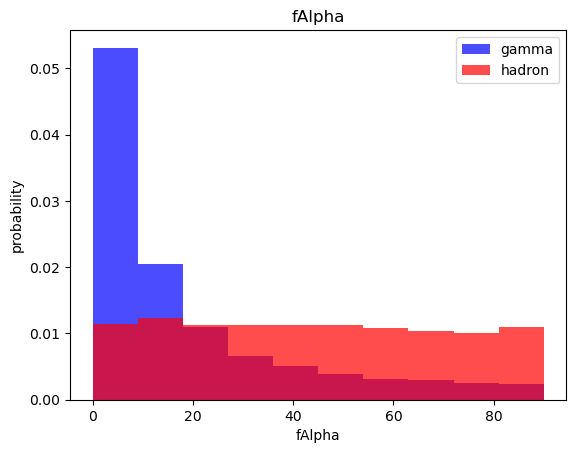

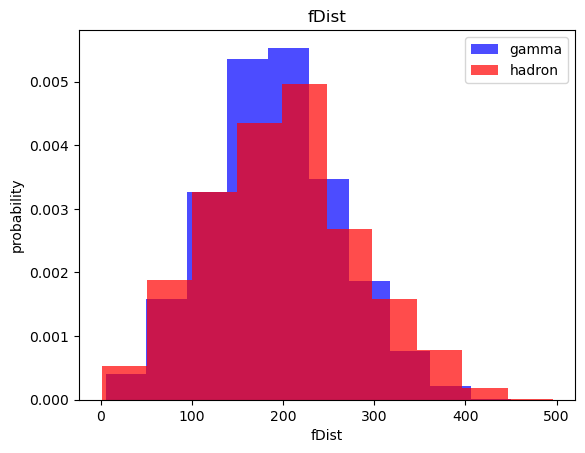

In [8]:
for label in cols[:-1]:
    plt.hist( df[ df["class"]==1 ][label], color="blue" , label="gamma" , alpha = 0.7,density=True  )
    plt.hist( df[ df["class"]==0 ][label], color="red" , label="hadron" , alpha = 0.7,density=True  )
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("probability")
    plt.legend()
    plt.show()

# Train, valiition , Test data set.


In [9]:
train, valid, test = np.split( df.sample(frac=1) , [int(0.6*len(df)), int(0.8*len(df)) ] )

/home/ashwin/.conda/envs/ml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
# how we have to scale the data to get propper result else it will beprint( not accurete predication
print(train)

        fLength   fWidth   fSize   fConc  fConcl    fAsym   fMllong  fX3Trans  \
12016   40.0770  18.7191  2.8228  0.2617  0.1617 -16.0358  -31.7223   11.0383   
6068    63.5795  28.1548  3.4246  0.2220  0.1285  44.4723   61.6560  -13.3325   
17559   35.7821  19.2220  2.7709  0.4610  0.3025  28.0146   35.0990  -18.3882   
10573   57.0682  24.5172  3.2718  0.2134  0.1190 -57.7988   34.6134   -8.7820   
16893   18.8261  14.1970  2.6298  0.4629  0.2616  20.4205   14.7587   10.0302   
...         ...      ...     ...     ...     ...      ...       ...       ...   
5535    83.3045  21.4643  3.0953  0.2128  0.1240 -40.8964   70.6312  -16.6665   
18126  144.7300  43.9751  3.4122  0.1033  0.0571  11.6485 -147.6160   33.0563   
2367    13.4530   9.7891  2.2418  0.8252  0.4957  13.0028    7.8225  -11.3998   
1724    32.3989  16.4734  2.5798  0.4079  0.2566  24.9950   30.3294   12.8753   
11391   33.0671  22.1890  2.6924  0.3350  0.1756  16.1518   29.0082   20.4612   

        fAlpha    fDist  cl

In [11]:
def scaledataset(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    x = scaler.fit_transform(X)

    if oversample:
      ros = RandomOverSampler()
      X, y = ros.fit_resample(X,y)
    
    data = np.hstack((X, np.reshape(y,(-1,1) )))
        #-1 means the len(y)
    return data, X, y

In [12]:
print(len(train [ train["class"] == 1])) # Gamas
print(len(train [ train["class"] == 0])) #Hadrons

# So now we have to over sample the data as the numbers of Hadron data is very less 

7459
3953


In [13]:
train, X_train, y_train = scaledataset(train,oversample=True)
test, x_test, y_test = scaledataset(test,oversample=False)
valid, x_valid, y_valid = scaledataset(valid,oversample=False)

In [14]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:

y_predict = knn_model.predict(x_test)


In [17]:
y_predict

array([0, 1, 1, ..., 0, 0, 1])

In [18]:
y_test

array([1, 0, 1, ..., 1, 0, 1])

In [19]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1406
           1       0.81      0.83      0.82      2398

    accuracy                           0.77      3804
   macro avg       0.75      0.75      0.75      3804
weighted avg       0.77      0.77      0.77      3804



In [20]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1406
           1       0.81      0.83      0.82      2398

    accuracy                           0.77      3804
   macro avg       0.75      0.75      0.75      3804
weighted avg       0.77      0.77      0.77      3804



In [21]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1406
           1       0.81      0.83      0.82      2398

    accuracy                           0.77      3804
   macro avg       0.75      0.75      0.75      3804
weighted avg       0.77      0.77      0.77      3804



# Naive Bayes


In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb_model = GaussianNB()

In [27]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [28]:
y_predict = nb_model.predict(x_test)

In [29]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      0.39      0.49      1406
           1       0.71      0.88      0.79      2398

    accuracy                           0.70      3804
   macro avg       0.69      0.64      0.64      3804
weighted avg       0.70      0.70      0.68      3804



# SVM

In [31]:
from sklearn.svm import SVC

In [34]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [36]:
Y_predict = svm_model.predict(x_test)

In [38]:
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      1406
           1       0.83      0.87      0.85      2398

    accuracy                           0.80      3804
   macro avg       0.79      0.78      0.79      3804
weighted avg       0.80      0.80      0.80      3804



# Neural Network

In [41]:
import tensorflow as tf

In [72]:

def plot_loss_accuracy(history):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))

    ax1.plot(history.history['loss'],label='loss' )
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_ylabel('Binary crossentropy')
    ax1.set_xlabel('Epoch')


    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    
    ax1.legend()
    ax1.grid(True)
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

In [47]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
    ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=['accuracy'])

2023-12-21 23:38:25.644623: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [48]:
history = nn_model.fit(
    X_train,y_train,epochs=100,batch_size=32,validation_split=0.2
)

Epoch 1/100
373/373 [==============================] - 1s 2ms/step - loss: 1.0492 - accuracy: 0.6947 - val_loss: 0.4828 - val_accuracy: 0.7654
Epoch 2/100
373/373 [==============================] - 0s 1ms/step - loss: 0.5052 - accuracy: 0.7498 - val_loss: 0.7841 - val_accuracy: 0.6374
Epoch 3/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.7737 - val_loss: 0.7260 - val_accuracy: 0.6143
Epoch 4/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.7886 - val_loss: 0.4717 - val_accuracy: 0.7493
Epoch 5/100
373/373 [==============================] - 1s 1ms/step - loss: 0.4498 - accuracy: 0.7960 - val_loss: 0.3807 - val_accuracy: 0.8140
Epoch 6/100
373/373 [==============================] - 1s 1ms/step - loss: 0.4535 - accuracy: 0.7929 - val_loss: 0.6046 - val_accuracy: 0.6883
Epoch 7/100
373/373 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.7981 - val_loss: 1.0000 - val_accuracy: 0.4940

In [50]:
%%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


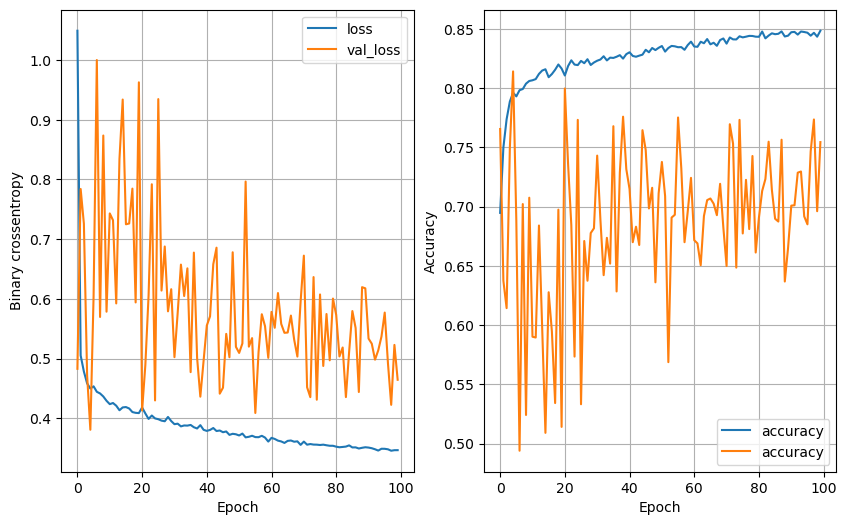

In [73]:
plot_loss_accuracy(history)

In [80]:

def trainmodel(X_train,y_train,num_nodes,dropout_prob,ir,batch_size,epochs):
    nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation="relu"),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation="relu"),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation="sigmoid")
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=['accuracy'] )

    history = nn_model.fit(
        X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0
    )
    return nn_model, history
    

In [ ]:
%%time
epochs=100
num_nodes,dropout_prob,ir,batch_size = 32,0.1,0.01,32
model, history = trainmodel(X_train,y_train,num_nodes,dropout_prob,ir,batch_size,epochs)
plot_loss_accuracy(history)

In [ ]:
%%time
least_val_loss = float('inf')
least_nn_model = None

epochs=100

for num_nodes in [8,16,32]:
    for dropout_prob in [0 , 0.2]:
        for ir in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64]:
                print(f'Batch size: {batch_size} , ir: {ir}, dropout prob: {dropout_prob}, numnode: {num_nodes} ')
                model, history = trainmodel(X_train,y_train,num_nodes,dropout_prob,ir,batch_size,epochs)
                plot_loss_accuracy(history)

